<a href="https://colab.research.google.com/github/SamrithaaJeeva/Predicting-Income-Based-on-Census-Data---Machine-Learning/blob/main/machine_learning_cw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Uploading the dataset**

In [1]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
adult = fetch_ucirepo(id=2)
X = adult.data.features
y = adult.data.targets
print(adult.metadata)
print(adult.variables)


{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Mon Aug 07 2023', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': 'Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the following conditions: ((AAG

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc


# **Data Exploration**

In [4]:
df=pd.concat([X,pd.DataFrame(y,columns=['income'])],axis=1)

In [5]:
df.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [7]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [9]:
print(df.columns)


Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')


#                             **Data Cleaning**






In [10]:
# Display the number of missing values in each column before replacing '?'
print("Number of missing values in each column before replacing '?' with NaN:")
print(df.isnull().sum())


Number of missing values in each column before replacing '?' with NaN:
age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64


In [11]:
# Replace '?' with NaN
df.replace(r'\?', np.NAN, regex=True,inplace=True)

# Display the number of missing values in each column after replacing '?'
print("\nNumber of missing values in each column after replacing '?' with NaN:")
print(df.isnull().sum())


Number of missing values in each column after replacing '?' with NaN:
age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
income               0
dtype: int64


In [12]:

# Impute NaN values with mode for each column
df.fillna(df.mode().iloc[0],inplace=True)

# Display the number of missing values in each column after imputation
print("\nNumber of missing values in each column after imputing NaN with mode:")
print(df.isnull().sum())


Number of missing values in each column after imputing NaN with mode:
age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


# **Feature Engineering**

In [13]:
df['income'].unique()

array(['<=50K', '>50K', '<=50K.', '>50K.'], dtype=object)

In [14]:
df['income']=df['income'].str.replace('.','')

In [15]:
df['income'].unique()

array(['<=50K', '>50K'], dtype=object)

<ipython-input-15-09e606a1010e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap="copper")


<Axes: >

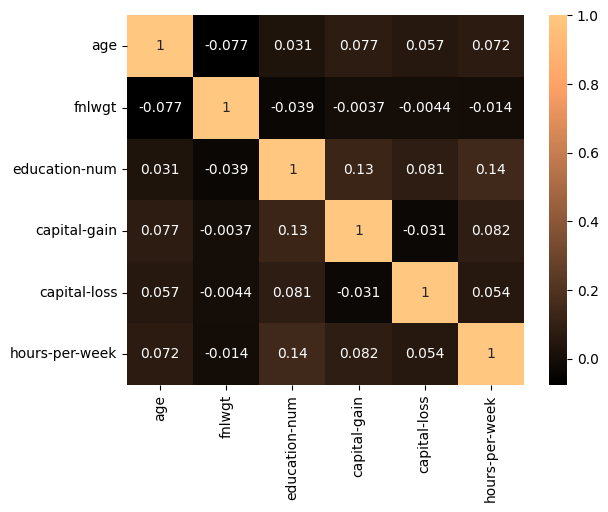

In [15]:
sns.heatmap(df.corr(),annot=True,cmap="copper")

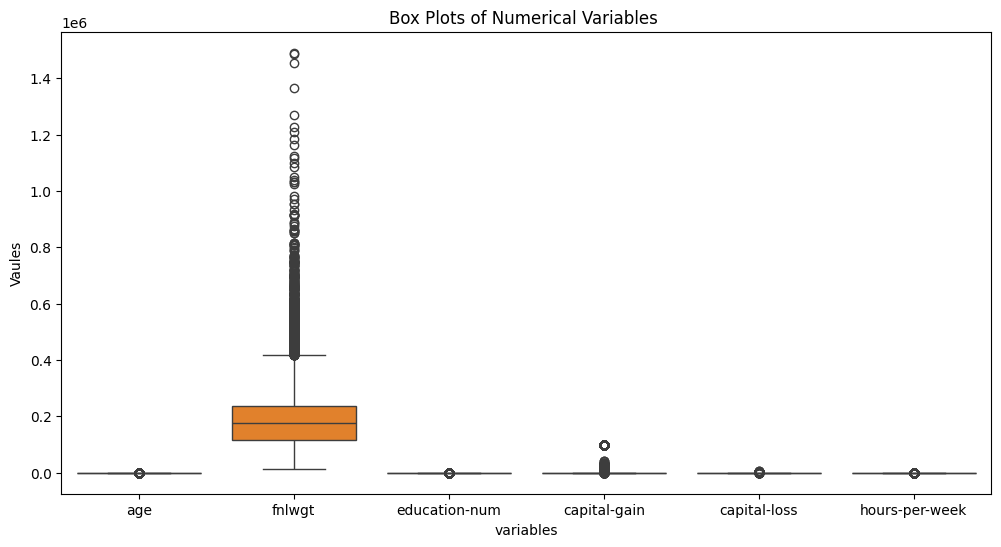

In [16]:
plt.figure(figsize =(12,6))
sns.boxplot(df)
plt.title('Box Plots of Numerical Variables ')
plt.xlabel('variables')
plt.ylabel('Vaules')
plt.show()

In [17]:
df.drop(columns=['fnlwgt'],inplace=True)

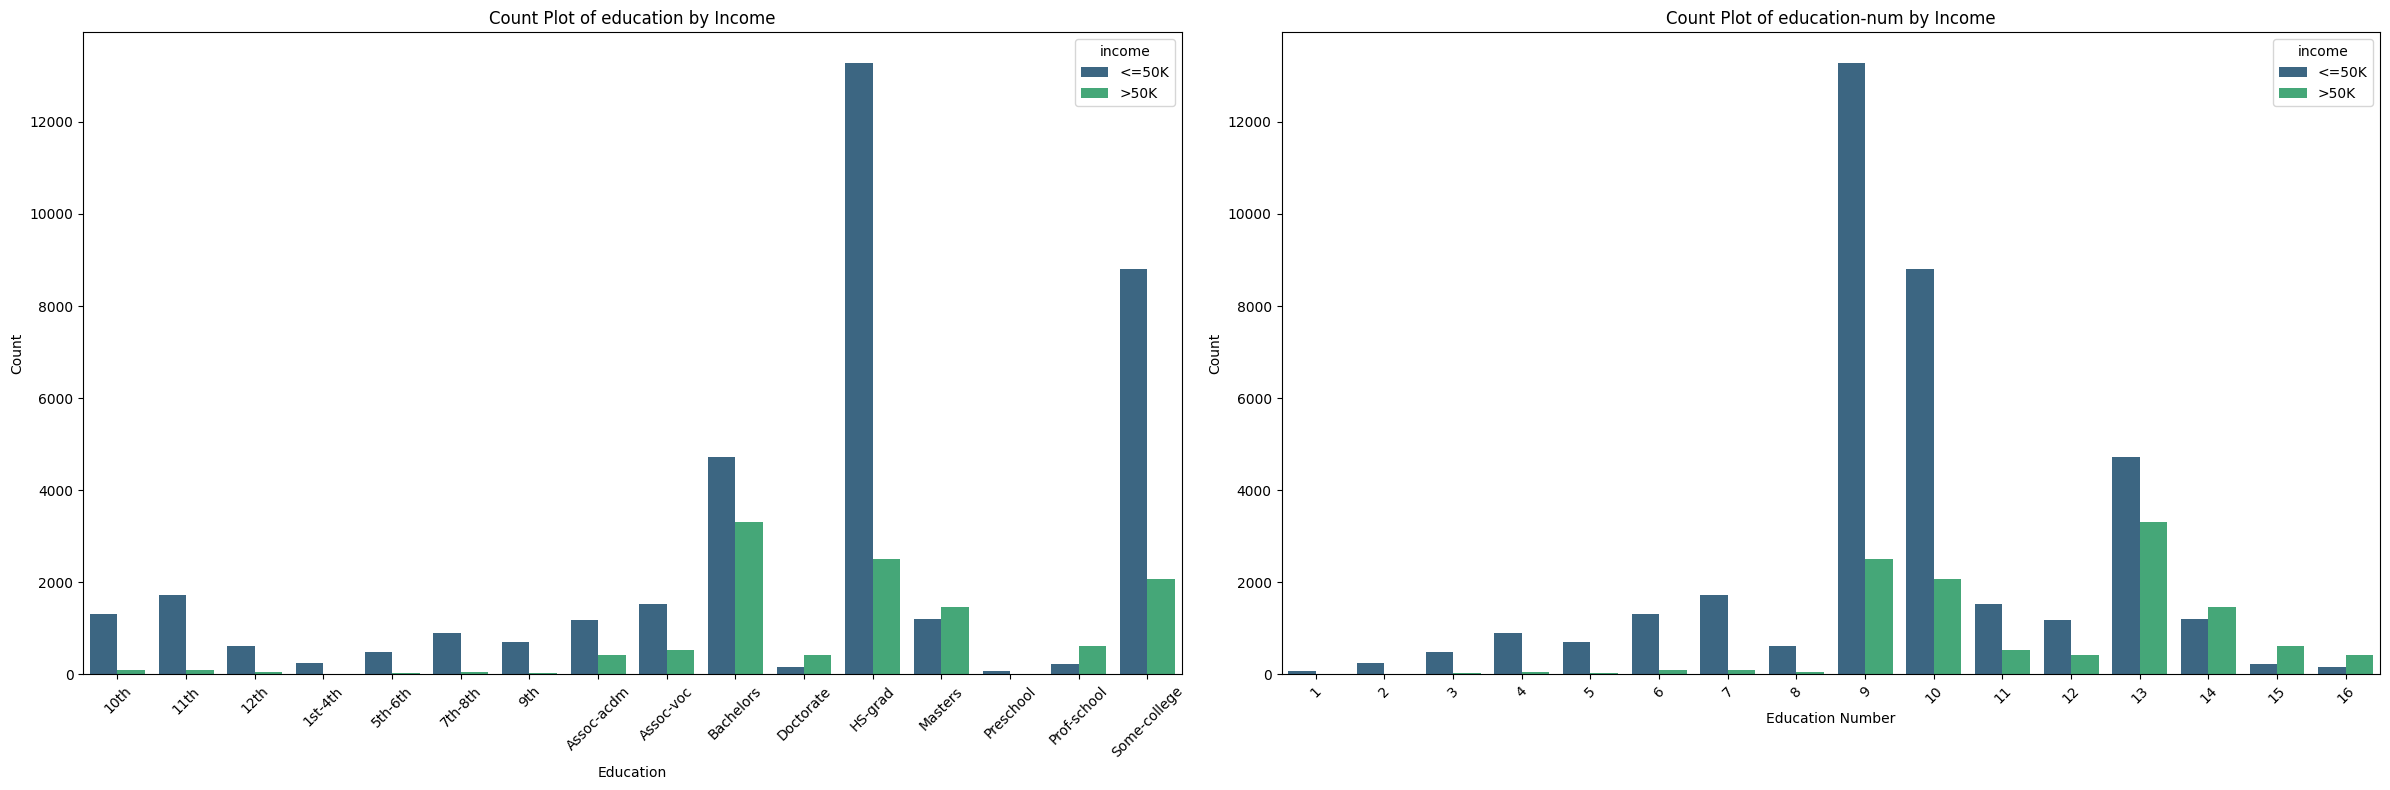

In [18]:
# Comparing between education & education-num

import matplotlib.pyplot as plt
import seaborn as sns

df['income'] = df['income'].str.replace('.', '')

# Plotting 'education' vs 'income'
plt.figure(figsize=(24, 8))

plt.subplot(1, 2, 1)
sns.countplot(data=df, x='education', hue='income', palette='viridis',order=sorted(df['education'].unique()))
plt.title('Count Plot of education by Income')
plt.xlabel('Education')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Plotting 'education-num' vs 'income'
plt.subplot(1, 2, 2)
sns.countplot(data=df, x='education-num', hue='income',palette='viridis', order=sorted(df['education-num'].unique()))
plt.title('Count Plot of education-num by Income')
plt.xlabel('Education Number')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [19]:
# Drop 'education_num' column
df.drop(columns=['education-num'], inplace=True)

# **Data Visualization(EDA)**

income
<=50K    37155
>50K     11687
Name: count, dtype: int64


<Axes: ylabel='count'>

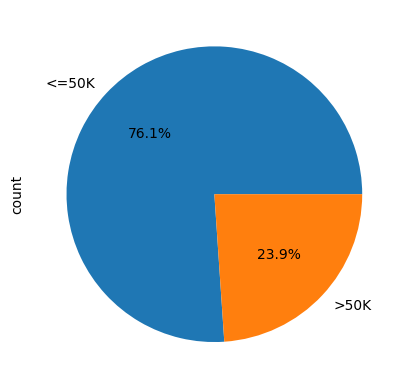

In [20]:
print(df['income'].value_counts())
df['income'].value_counts().plot.pie(autopct='%1.1f%%')

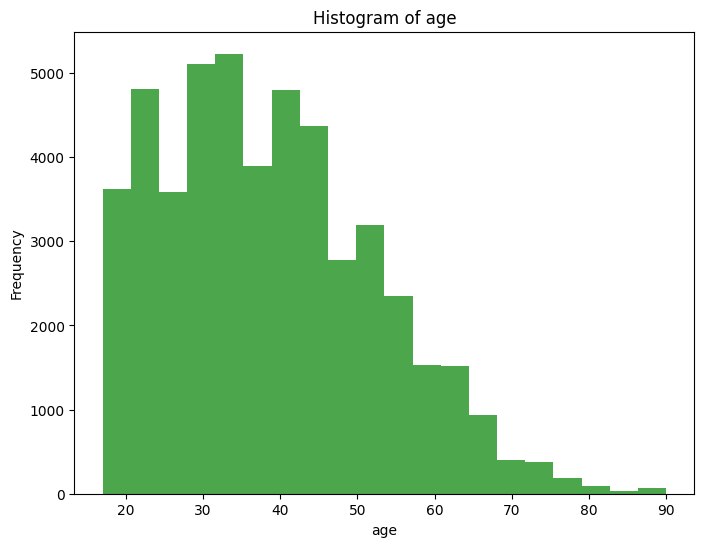

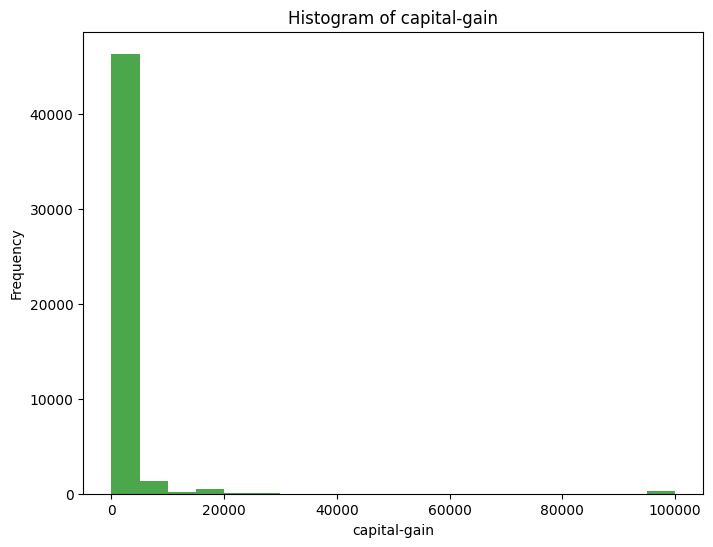

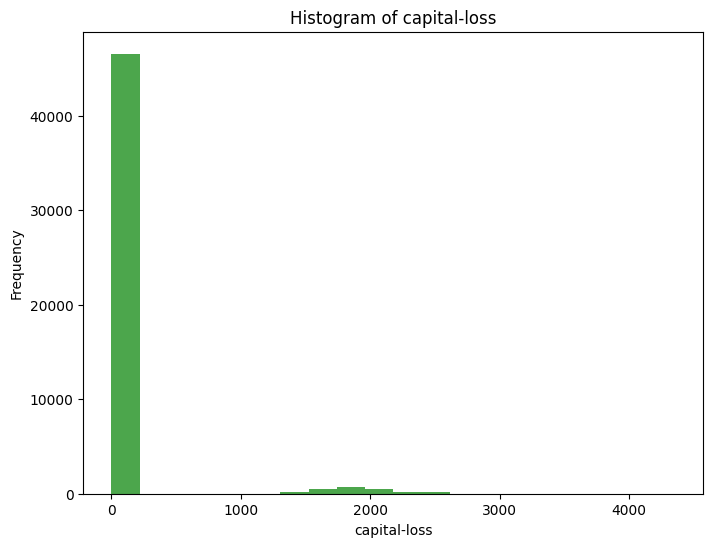

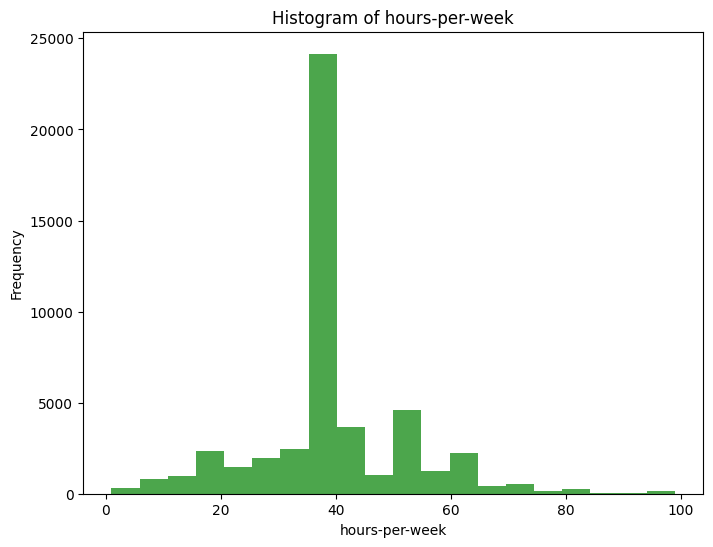

In [21]:
# Plot histograms for numerical
numerical_columns = df.select_dtypes(include=['int', 'float']).columns
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    plt.hist(df[column], bins=20, color='green', alpha=0.7)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


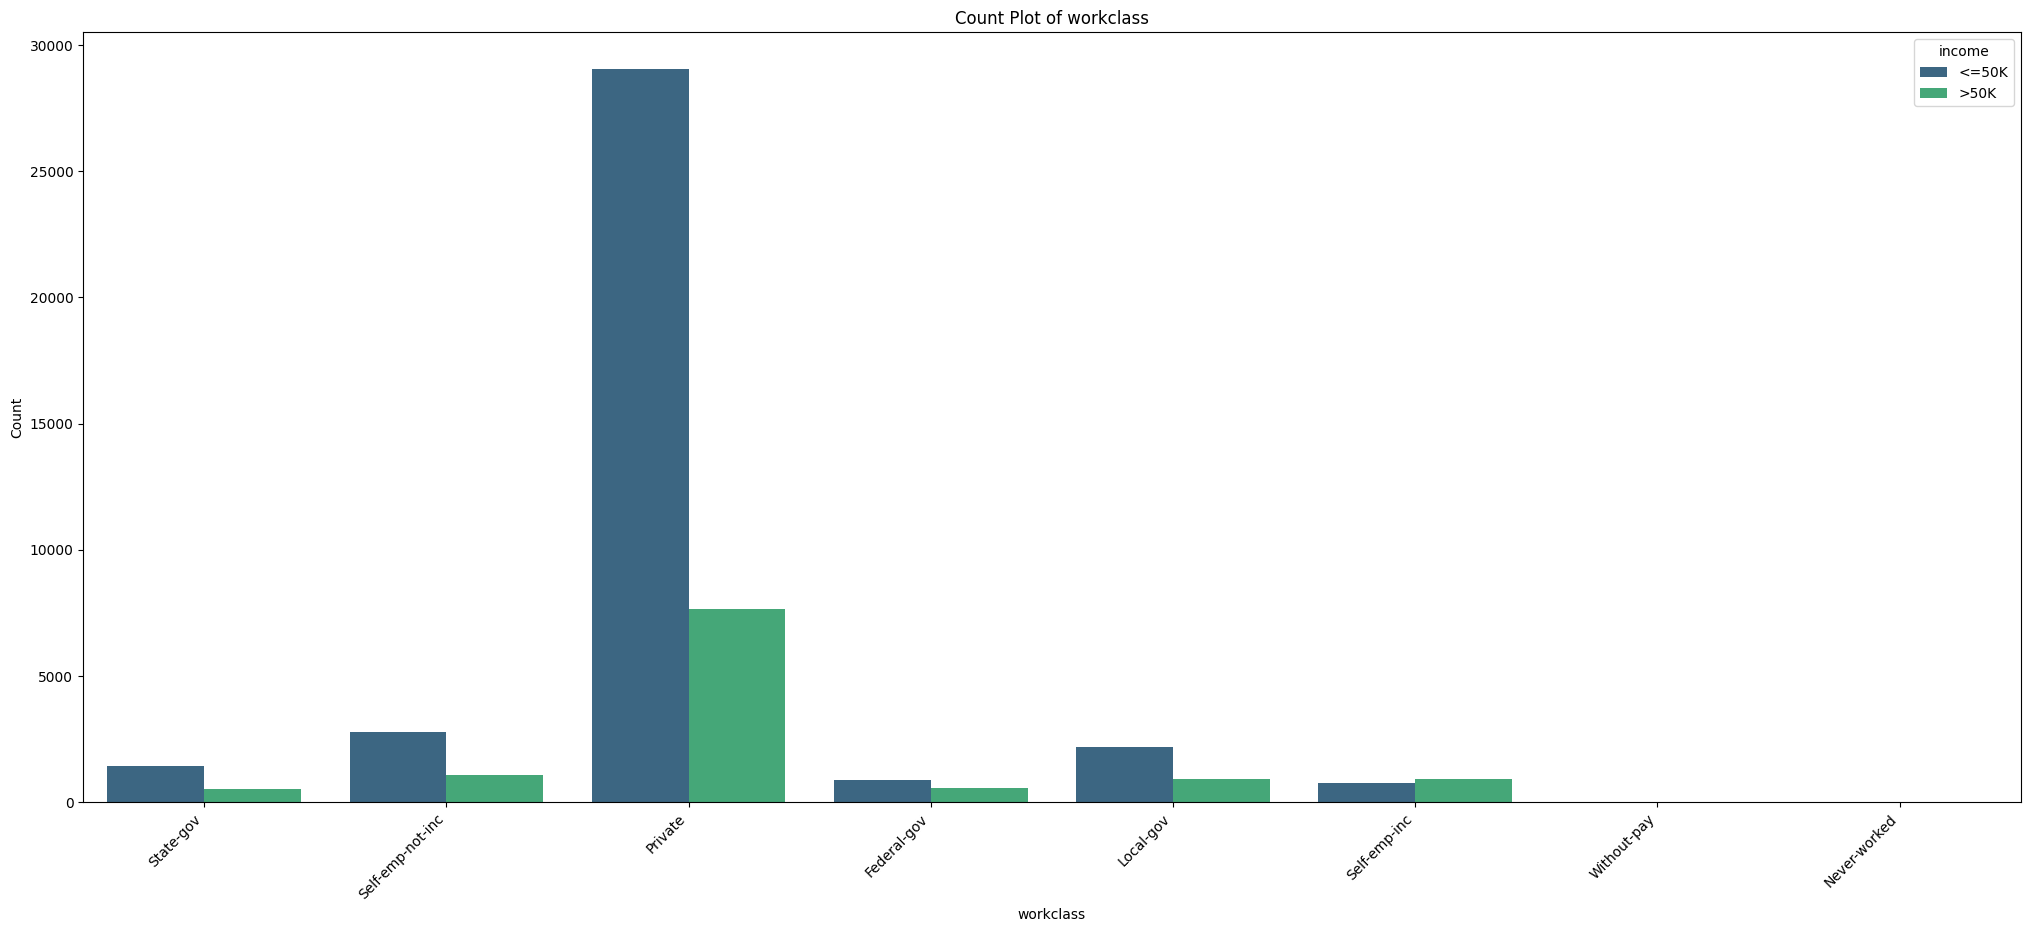

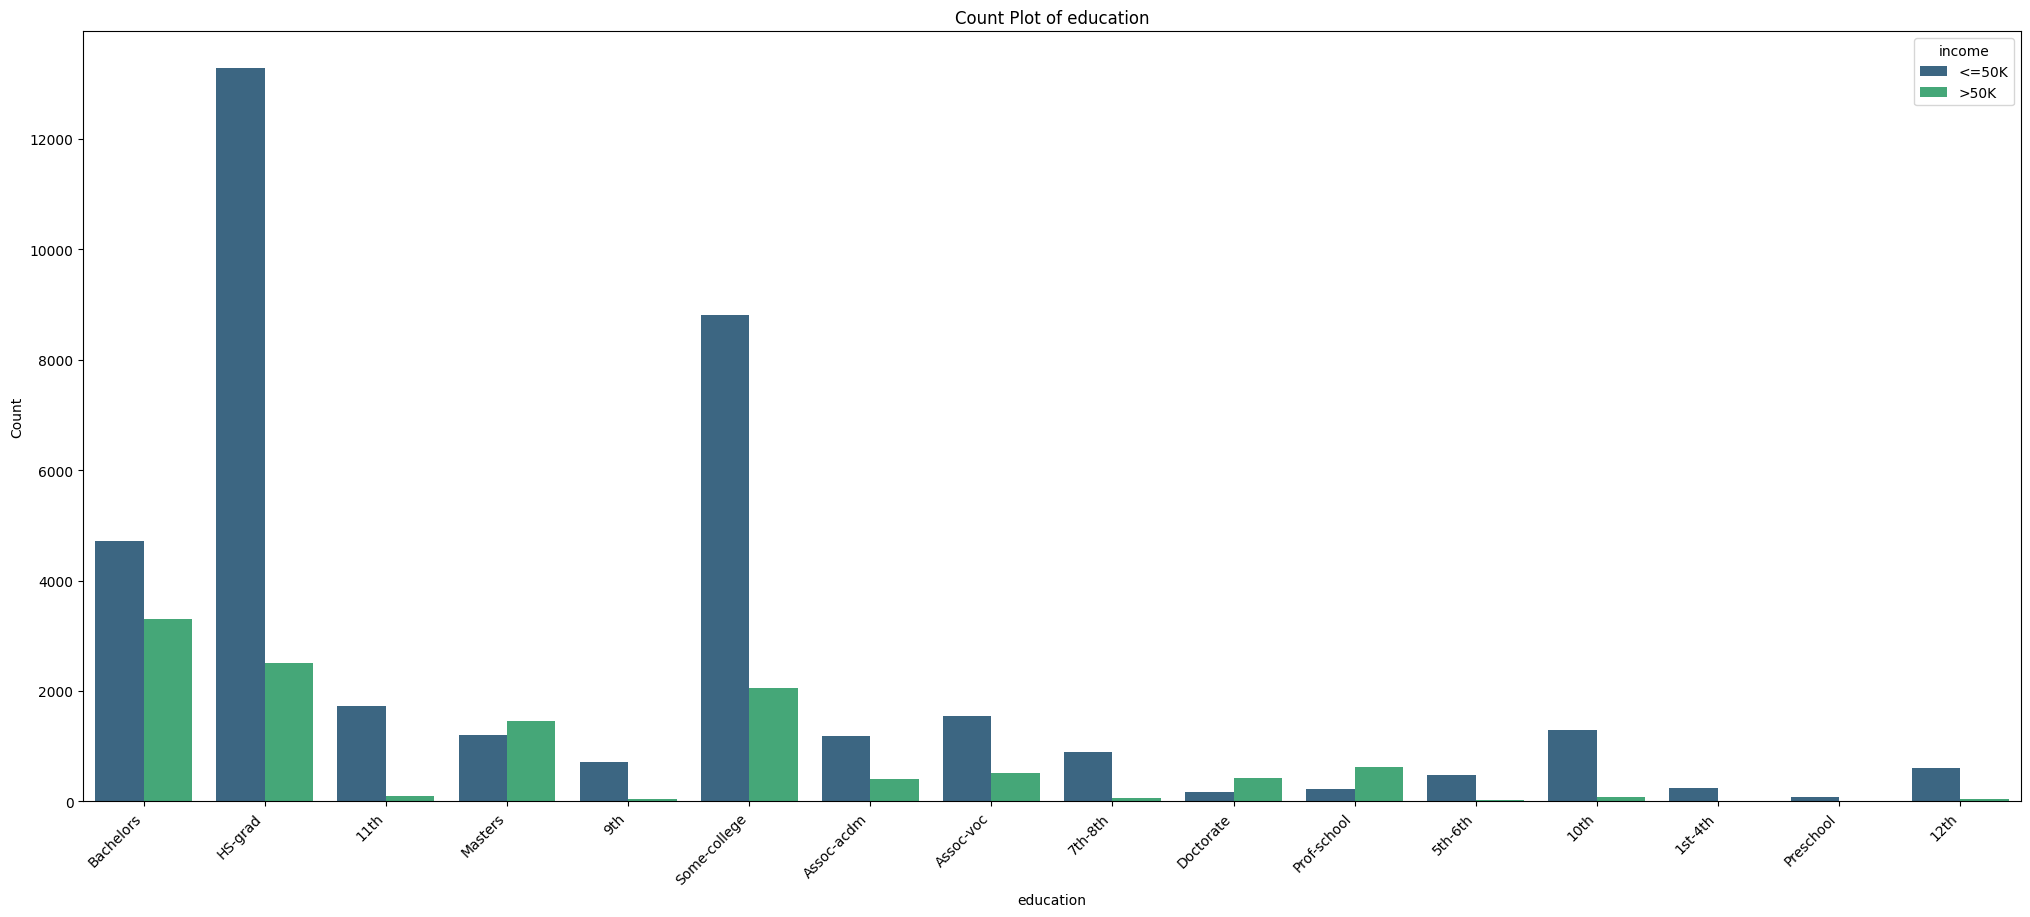

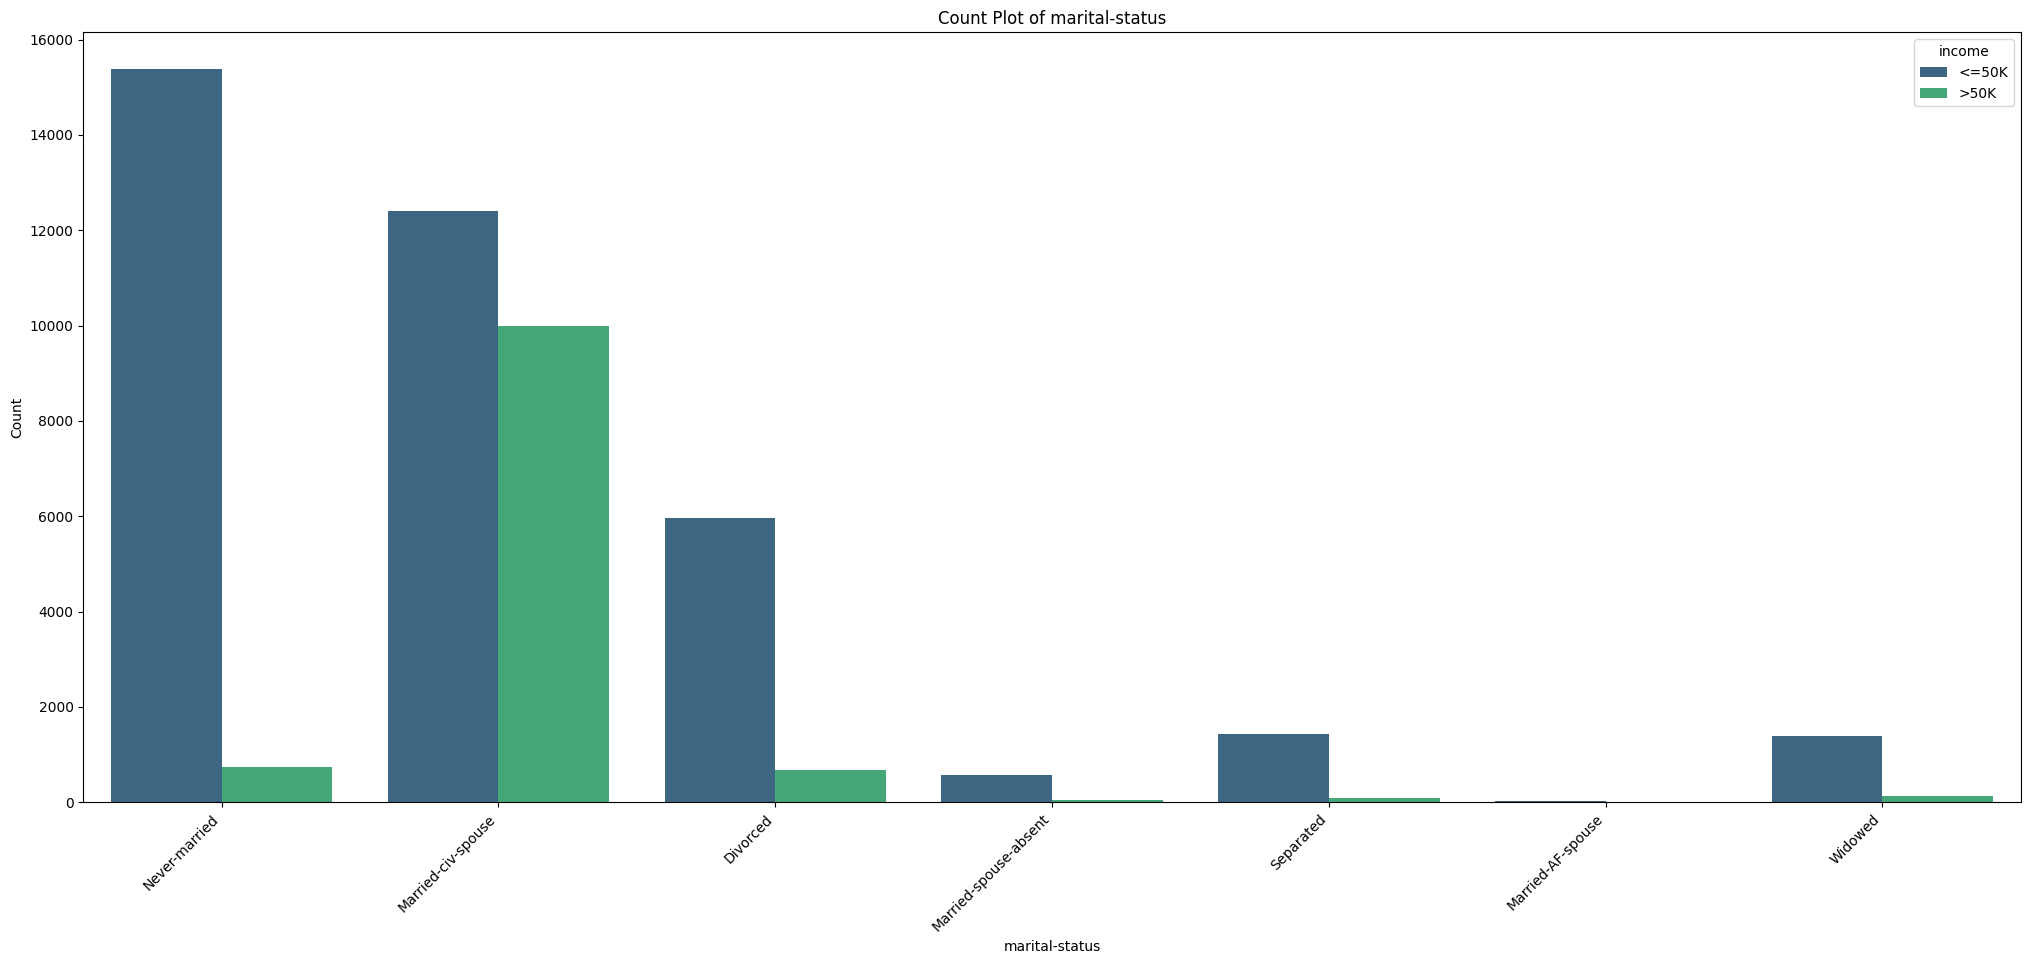

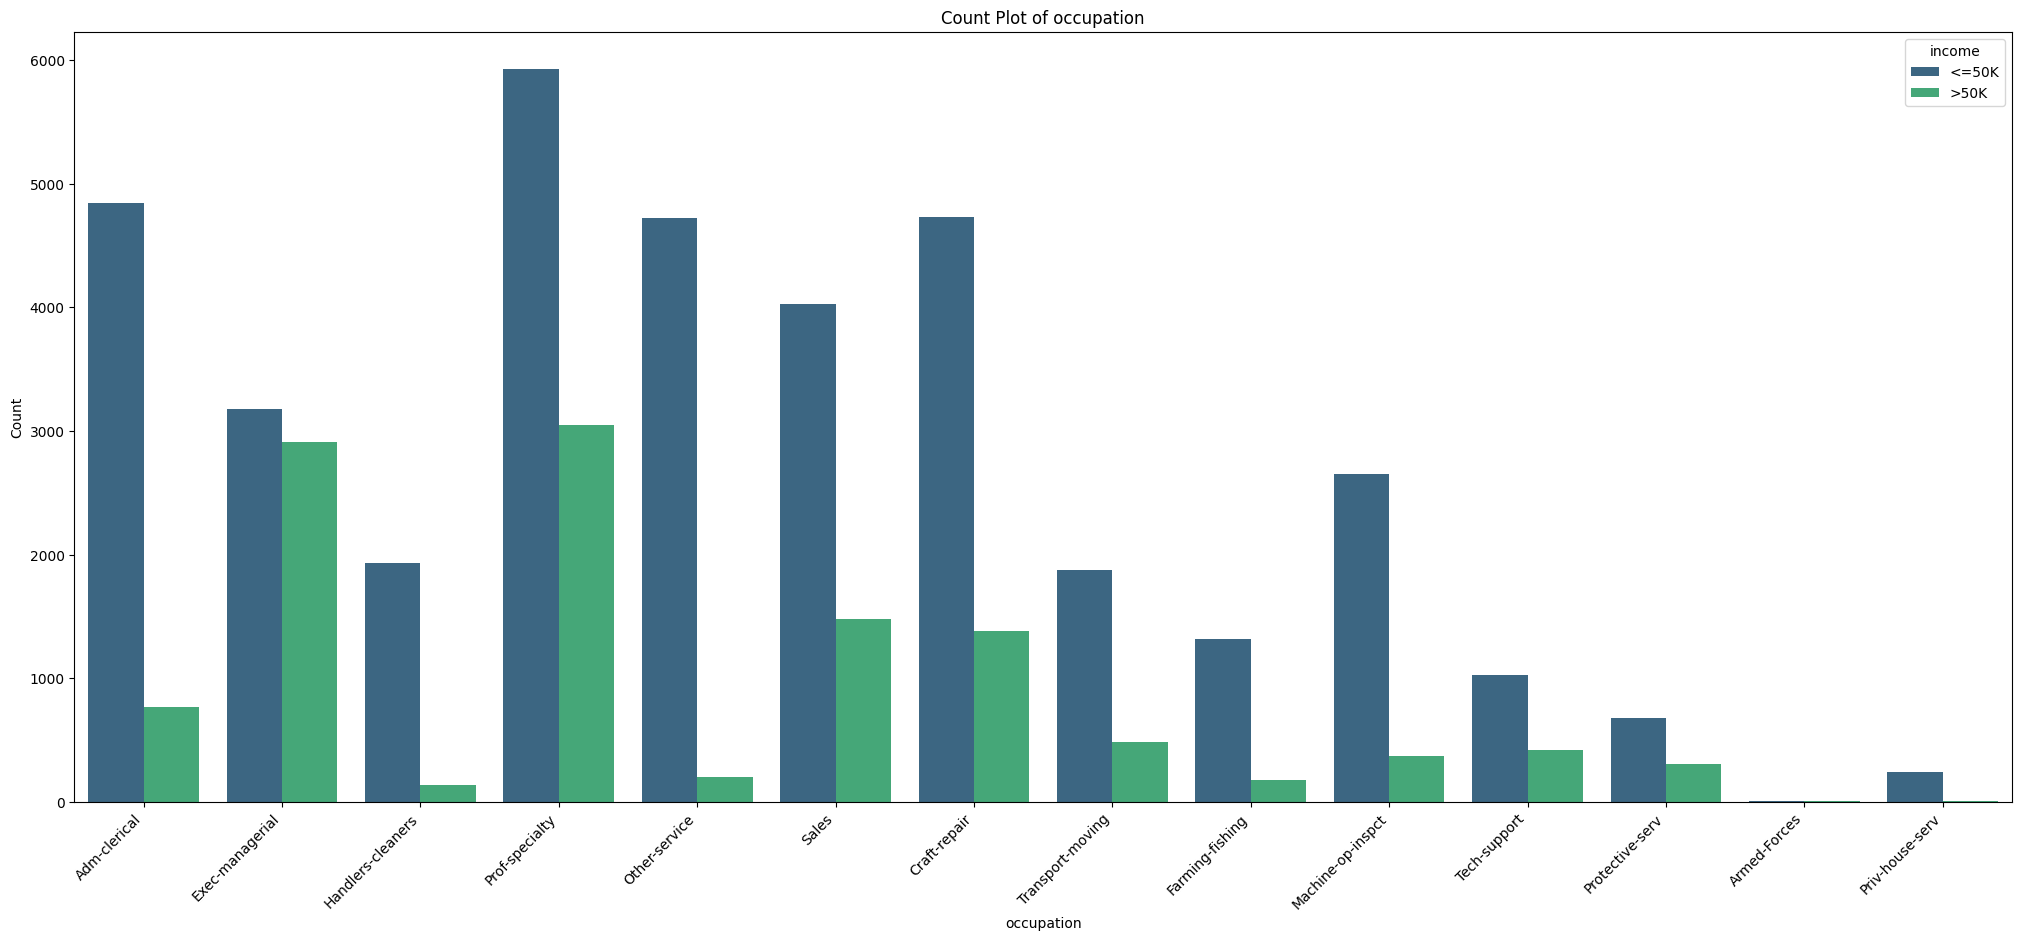

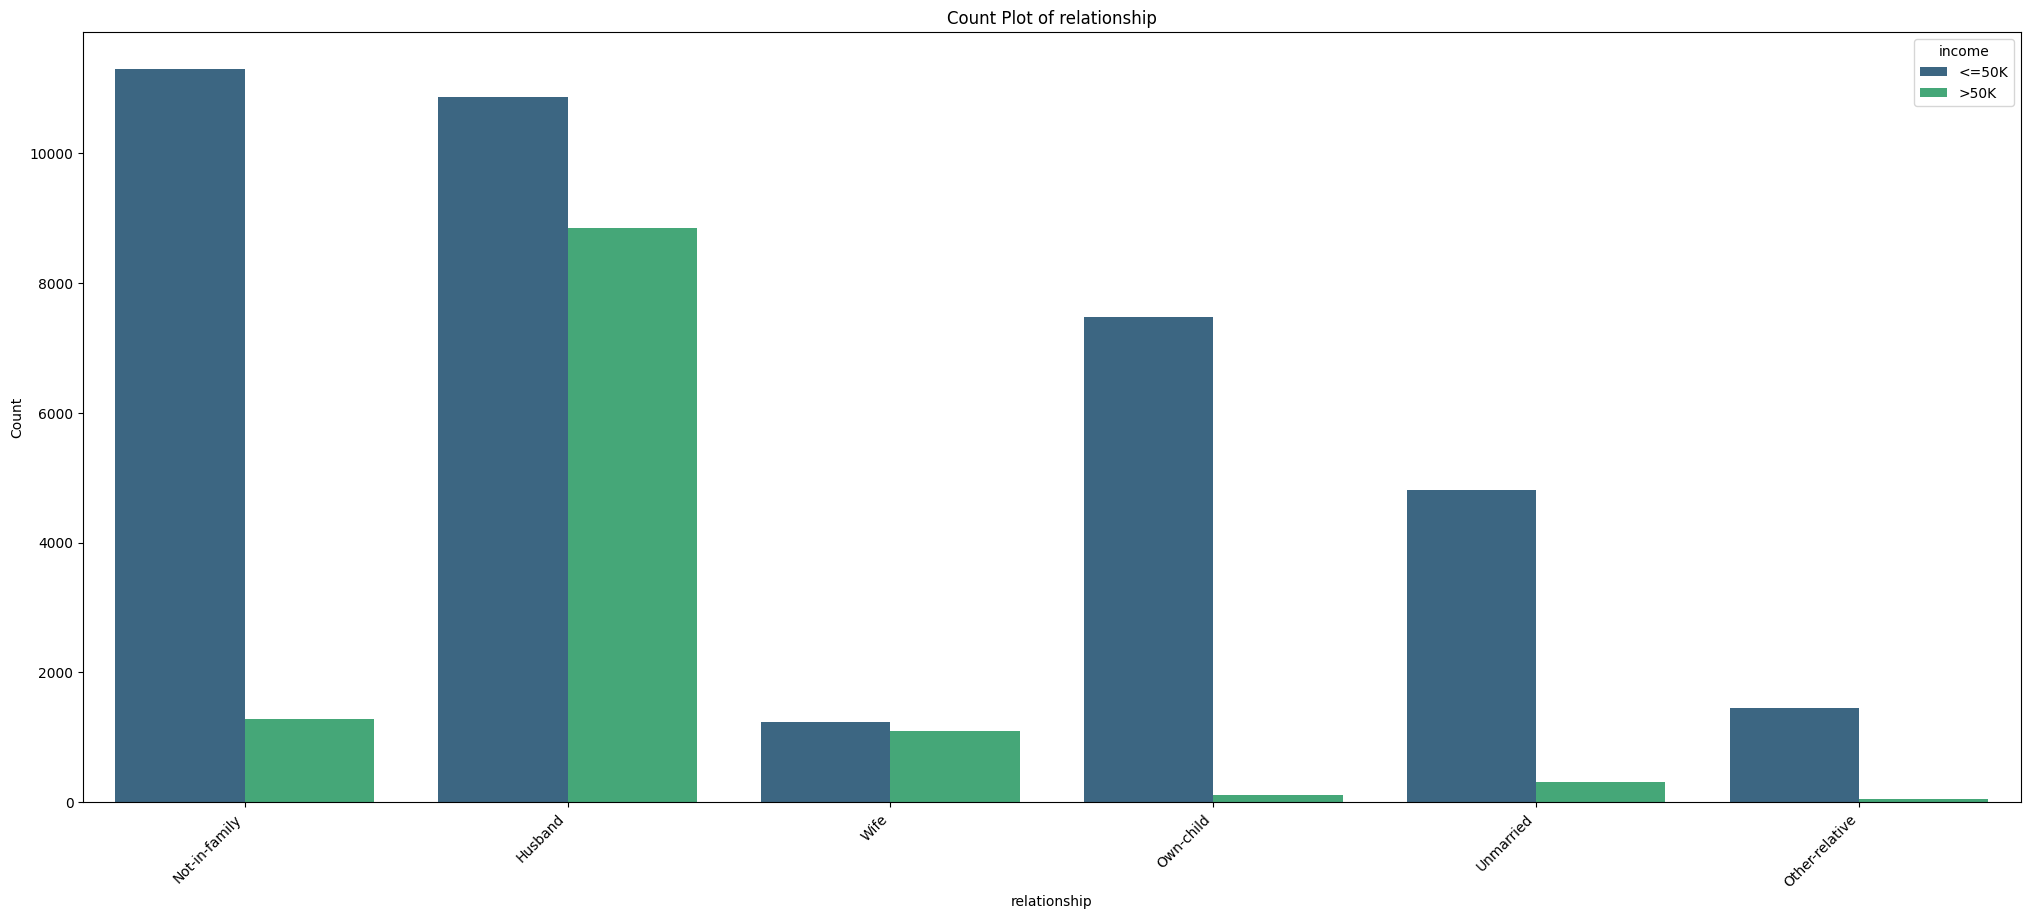

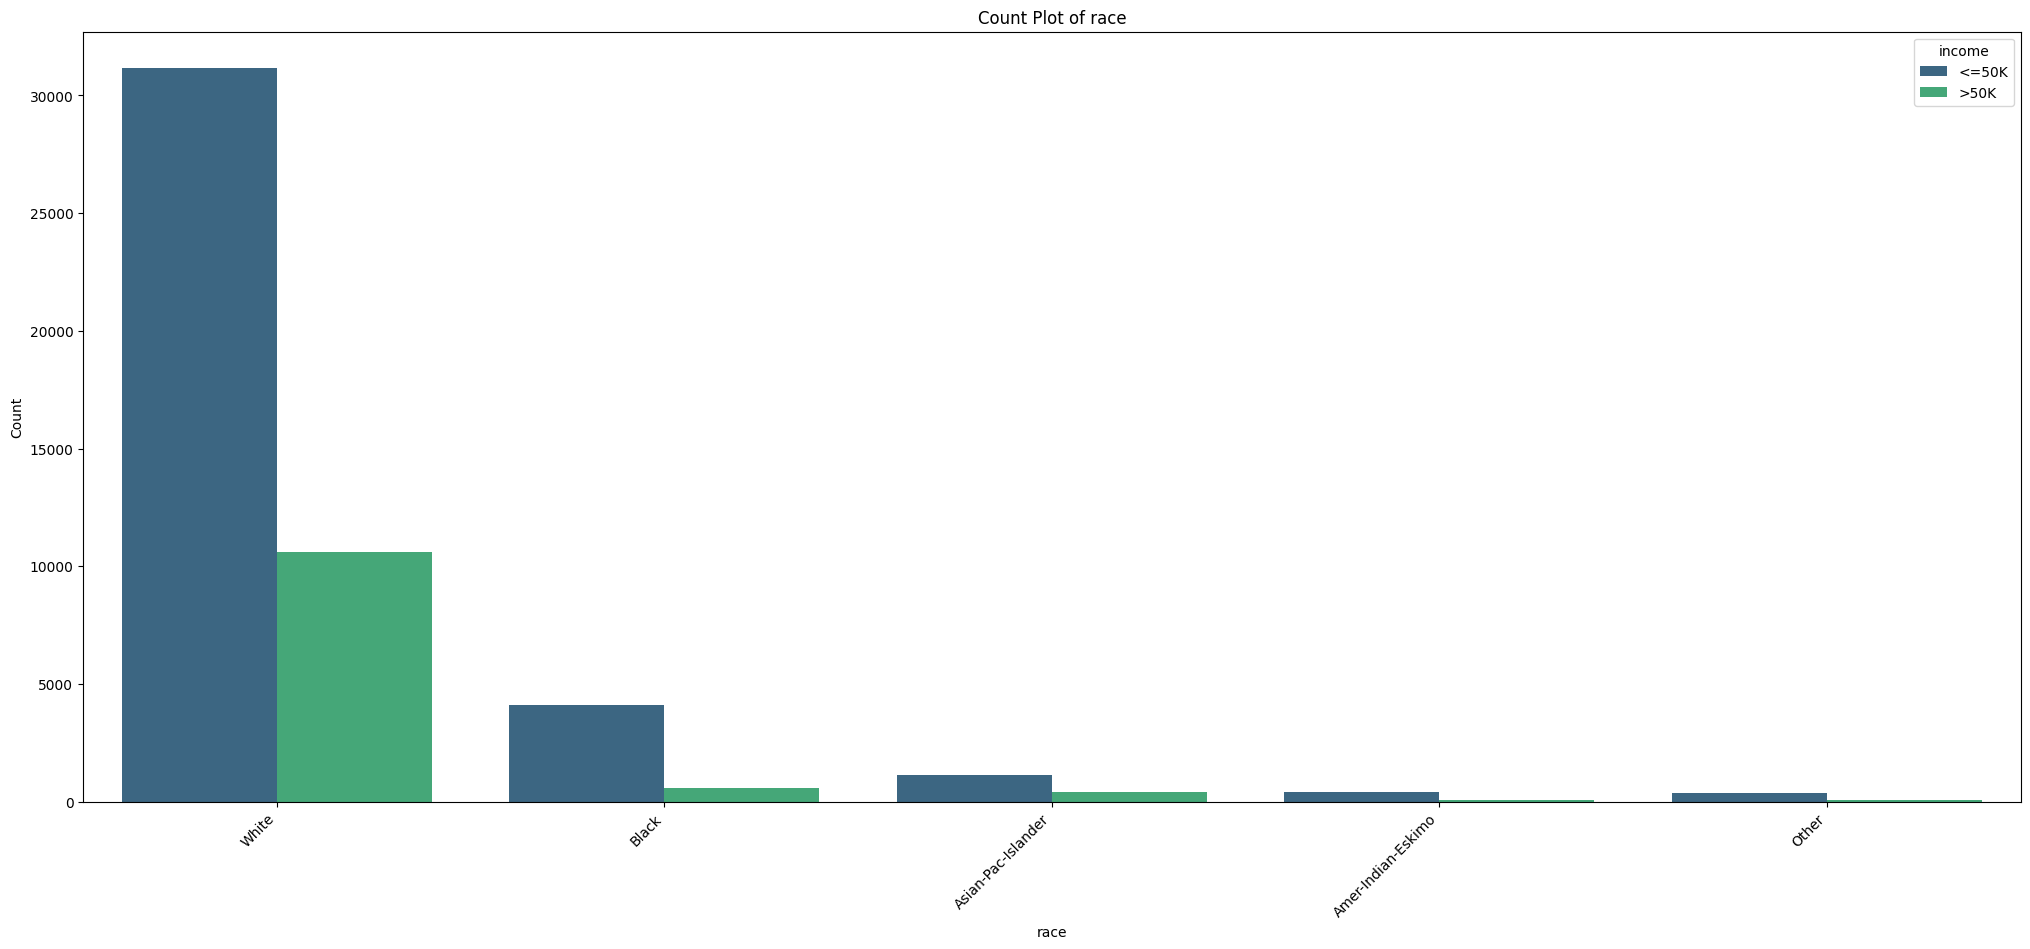

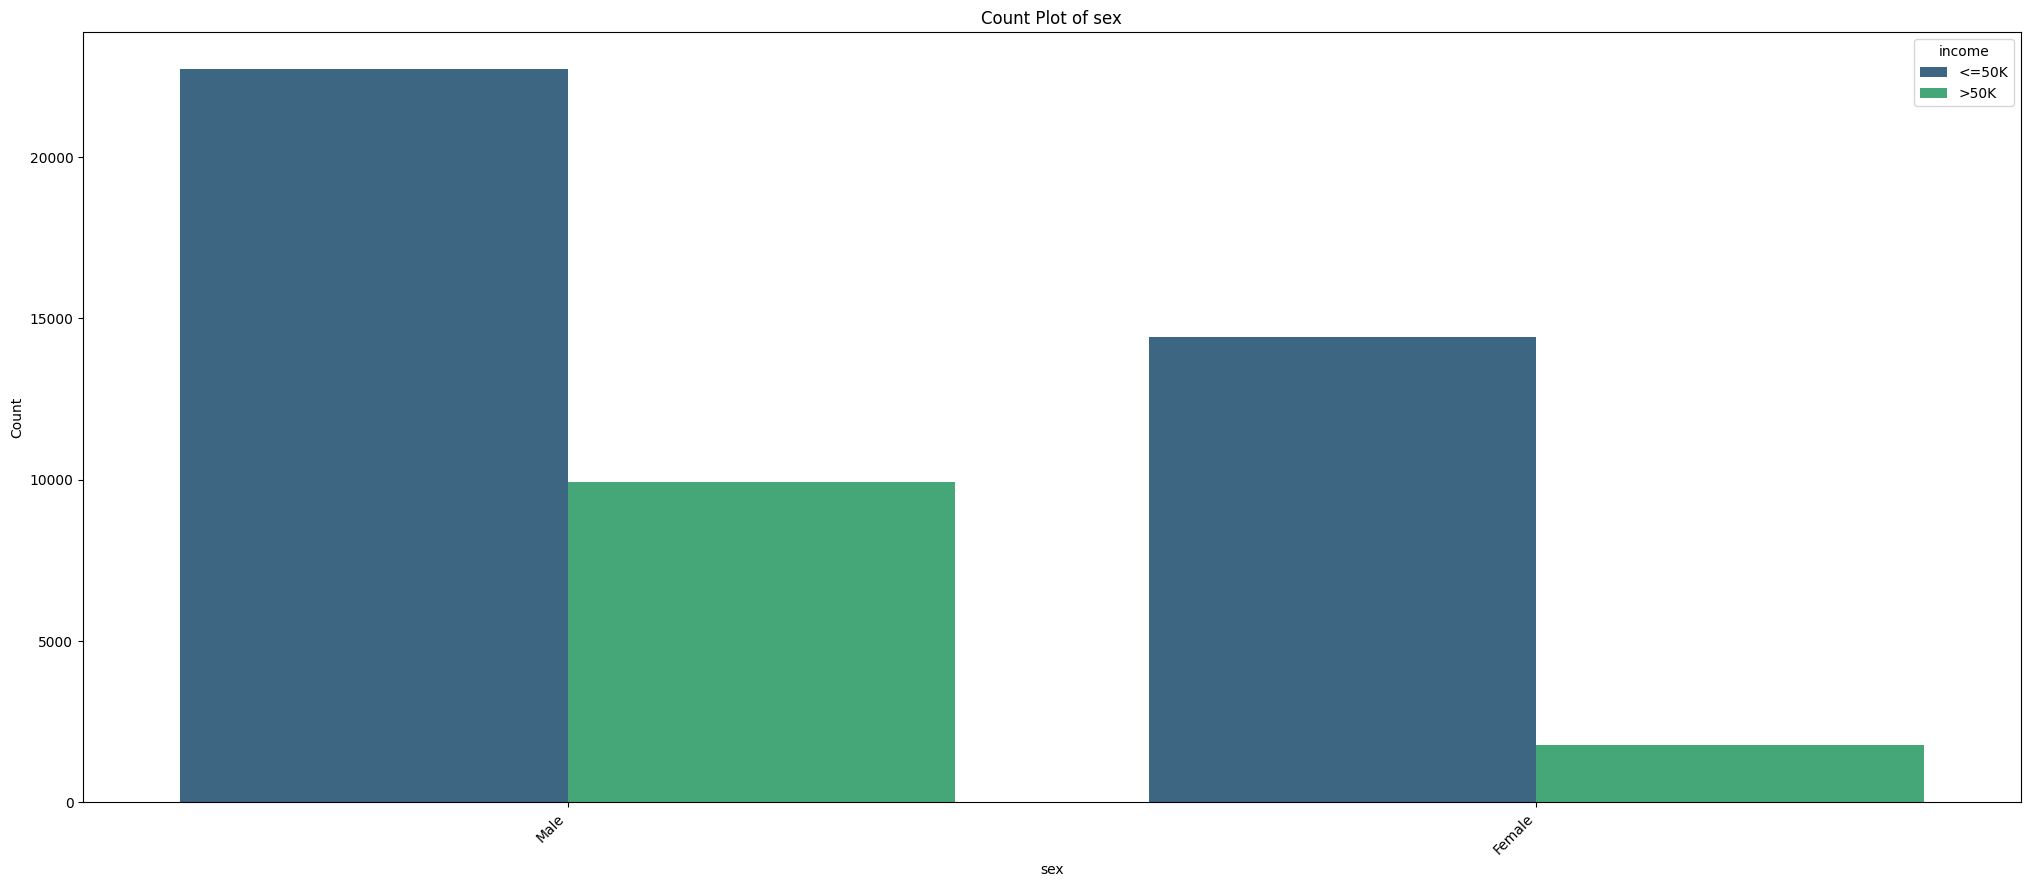

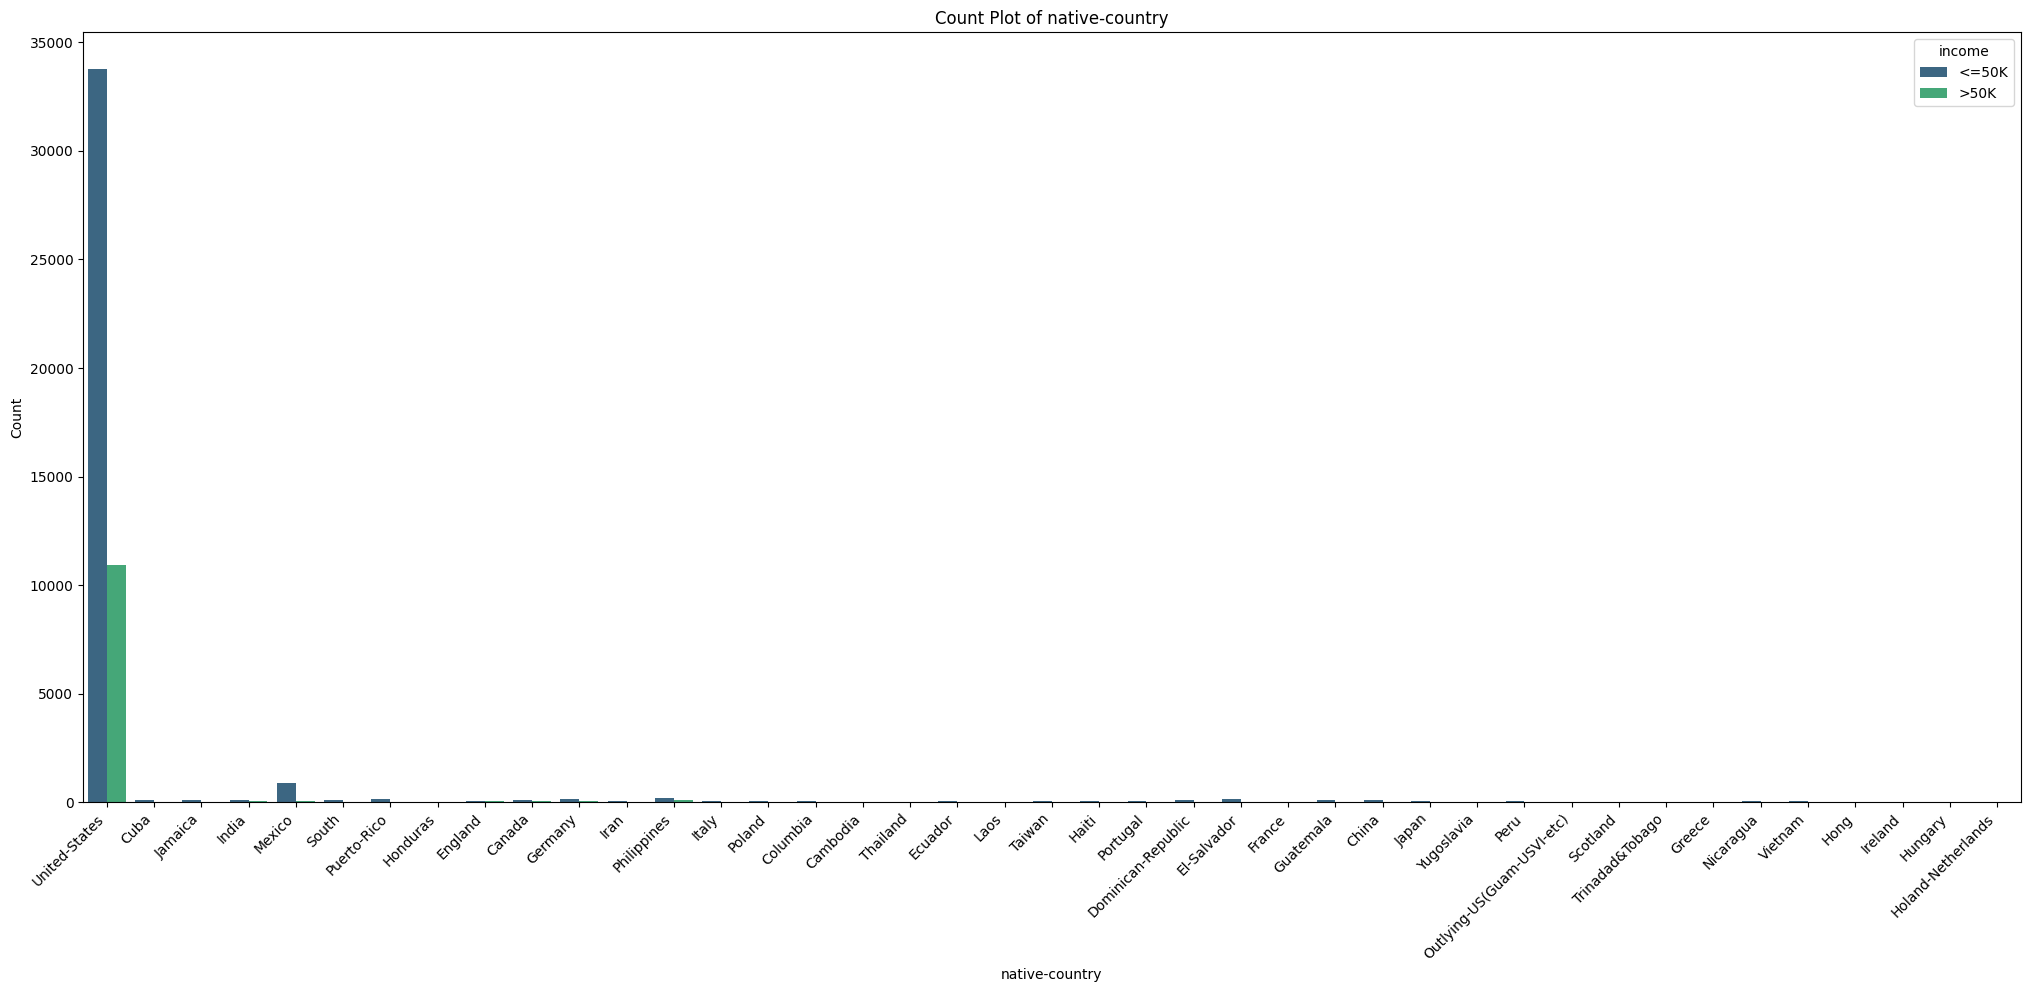

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


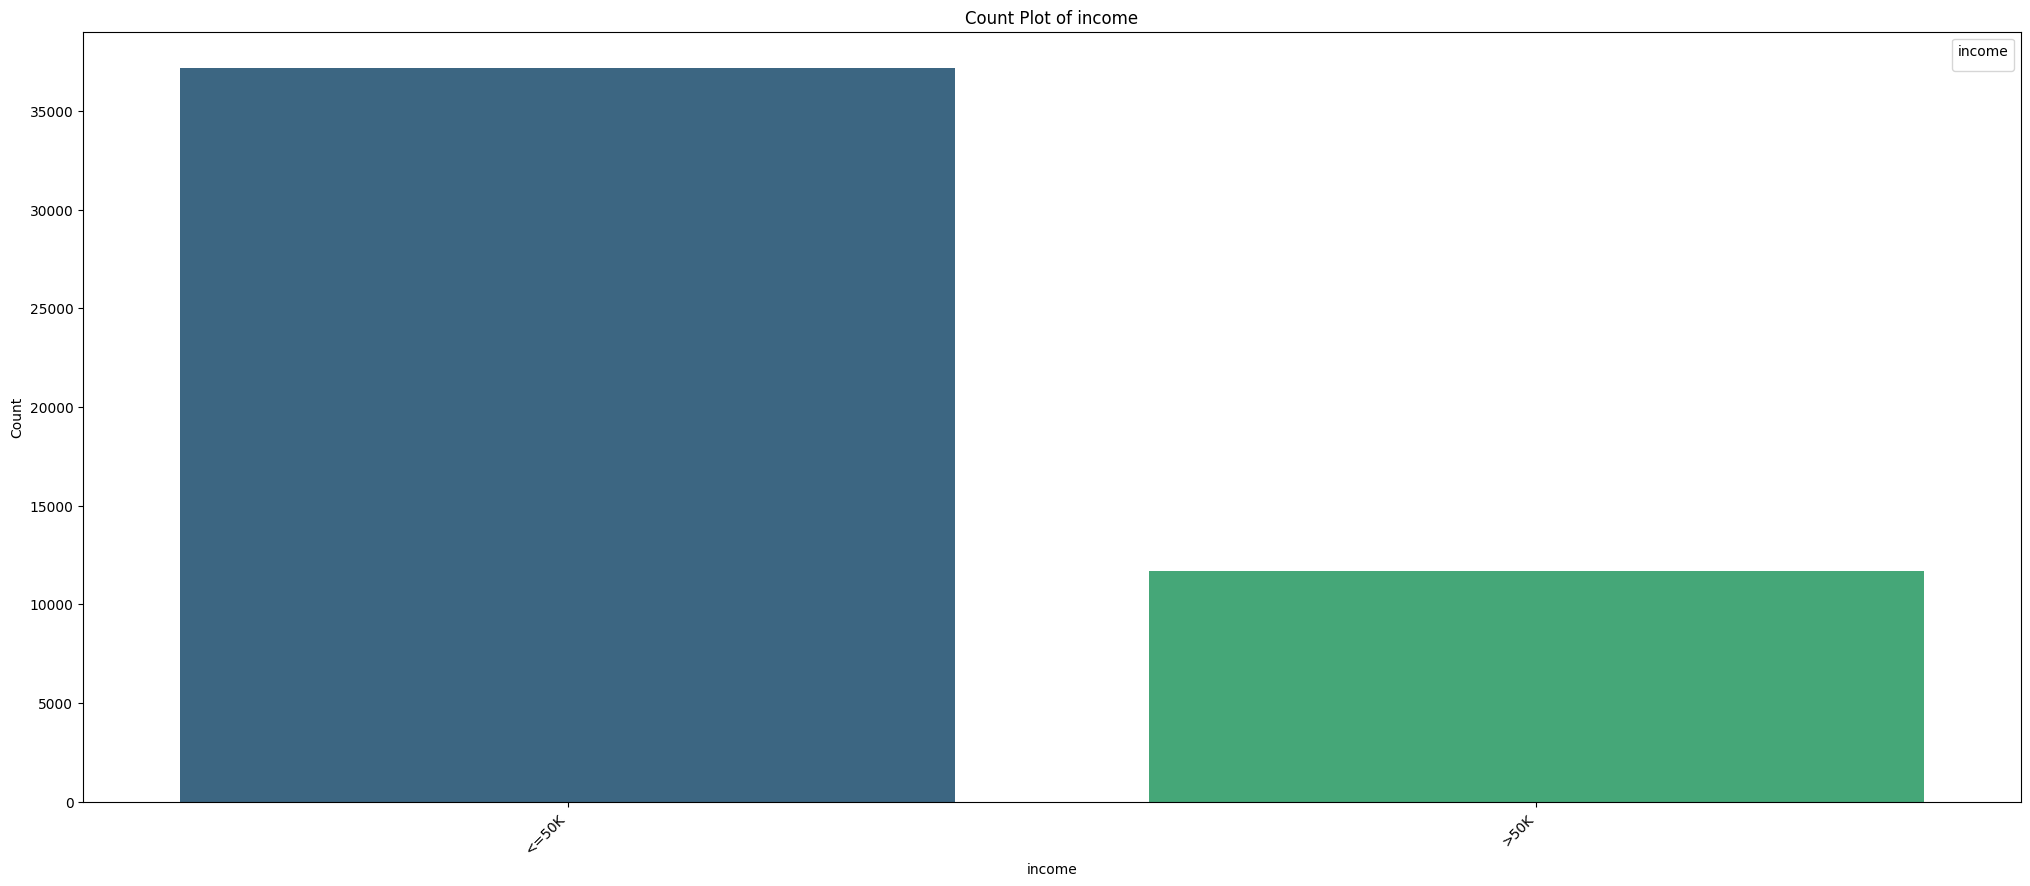

In [22]:
import seaborn as sns

# Plot count plots for categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    plt.figure(figsize=(25, 10))
    sns.countplot(data=df, x=column,hue = 'income', palette='viridis')
    plt.title(f'Count Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='income',loc ='upper right')
    plt.show()


# **Data Preprocessing**

In [23]:
# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Iterate over object columns and encode them
for column in df.select_dtypes(include=['object']).columns:
    df[column] = label_encoder.fit_transform(df[column])
print("\nEncoded Dataset:")
df.head()



Encoded Dataset:


,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,6,9,4,0,1,4,1,2174,0,40,38,0
1,50,5,9,2,3,0,4,1,0,0,13,38,0
2,38,3,11,0,5,1,4,1,0,0,40,38,0
3,53,3,1,2,5,0,2,1,0,0,40,38,0
4,28,3,9,2,9,5,2,0,0,0,40,4,0


In [24]:
# Initialize StandardScaler
scaler = StandardScaler()

# Define numerical features for scaling
numerical_features = ['age', 'capital-gain', 'capital-loss', 'hours-per-week']

df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [25]:
#Fixing skewness
df['capital-gain'] = np.log1p(df['capital-gain'])
df['capital-loss'] = np.log1p(df['capital-loss'])

# **Model Training & Evaluation**

Naïve Bayes Classification Accuracy: 0.7886170539461562
Naïve Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.83      0.86      7414
           1       0.55      0.66      0.60      2355

    accuracy                           0.79      9769
   macro avg       0.72      0.74      0.73      9769
weighted avg       0.80      0.79      0.79      9769

Misclassified Samples:
            age  workclass  education  marital-status  occupation  \
28188 -0.046942          3         11               2           2   
40834  0.317746          3          7               0           9   
27875  1.192996          3         11               2           7   
22608 -0.338691          3          8               2           0   
13398  0.828308          3         11               2           2   
...         ...        ...        ...             ...         ...   
28137  0.755371          3         11               2          13   
4160  -

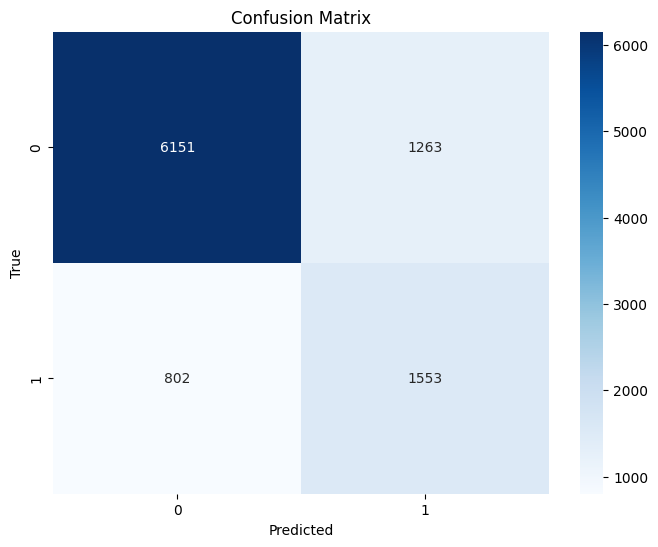

In [27]:
# Splitting the dataset into features and target variable
X = df.drop('income', axis=1)
y = df['income']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Addressing Class Imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Creating and training the Gaussian Naïve Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train_balanced, y_train_balanced)

# Making predictions on the test set
nb_pred = nb_model.predict(X_test)

# Evaluating the model
nb_accuracy = accuracy_score(y_test, nb_pred)
print("Naïve Bayes Classification Accuracy:", nb_accuracy)
print("Naïve Bayes Classification Report:")
print(classification_report(y_test, nb_pred))

# Analyzing Misclassifications
misclassified_indices = np.where(y_test != nb_pred)[0]
misclassified_samples = X_test.iloc[misclassified_indices]
print("Misclassified Samples:")
print(misclassified_samples)

# Plotting Confusion Matrix
cm = confusion_matrix(y_test, nb_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()




Random Forest Classification Accuracy: 0.8490121813901116
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      7414
           1       0.72      0.60      0.66      2355

    accuracy                           0.85      9769
   macro avg       0.80      0.77      0.78      9769
weighted avg       0.84      0.85      0.84      9769

Misclassified Samples:
            age  workclass  education  marital-status  occupation  \
22608 -0.338691          3          8               2           0   
21063  1.849433          6          9               2           2   
29642  0.463621          4          9               0           3   
32507  0.828308          3          9               2           9   
47649  3.745808          3         11               4           0   
...         ...        ...        ...             ...         ...   
16055 -0.192816          3         15               2           0   
727

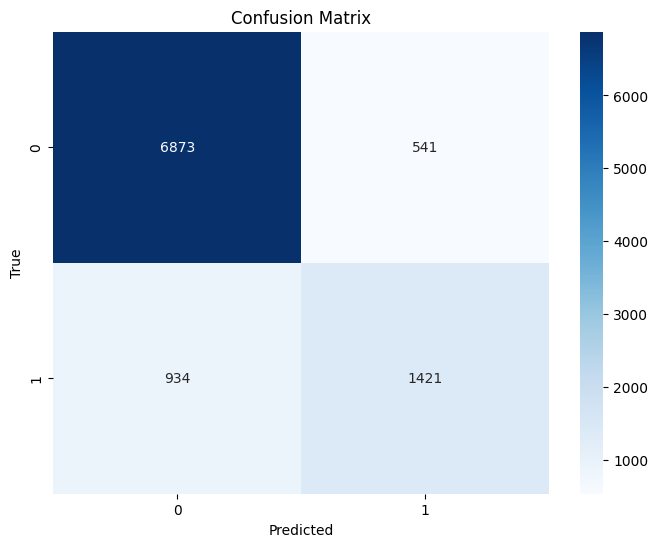

In [30]:
# Creating and training the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

#predictions on the test set
rf_pred = rf_model.predict(X_test)

# Evaluating the model
rf_accuracy = accuracy_score(y_test, rf_pred)
print("Random Forest Classification Accuracy:", rf_accuracy)
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_pred))

# Analyzing Misclassifications
misclassified_indices = np.where(y_test != rf_pred)[0]
misclassified_samples = X_test.iloc[misclassified_indices]
print("Misclassified Samples:")
print(misclassified_samples)

# Plotting Confusion Matrix
cm = confusion_matrix(y_test, rf_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


# **Cross Validation For Naive Bayes**

In [32]:
rf_model_cv = GaussianNB()

# Performing 5-fold cross-validation and printing the accuracy scores
cv_scores = cross_val_score(rf_model_cv, X_train_balanced, y_train_balanced, cv=5)
print("Cross-validation scores (Accuracy):", cv_scores)
print("Mean CV Score (Accuracy):", cv_scores.mean())

Cross-validation scores (Accuracy): [0.75783811 0.7558208  0.76302959 0.75580027 0.75571621]
Mean CV Score (Accuracy): 0.7576409943021922


# **Cross Validation**

In [33]:
rf_model_cv = RandomForestClassifier(n_estimators=100, random_state=42)

# Performing 5-fold cross-validation and printing the accuracy scores
cv_scores = cross_val_score(rf_model_cv, X_train_balanced, y_train_balanced, cv=5)
print("Cross-validation scores (Accuracy):", cv_scores)
print("Mean CV Score (Accuracy):", cv_scores.mean())


Cross-validation scores (Accuracy): [0.83088173 0.85937631 0.90400134 0.89626765 0.89929388]
Mean CV Score (Accuracy): 0.8779641853051741


# **Feature Importance**

In [34]:
# Train the Random Forest Classifier
rf_model.fit(X_train_balanced, y_train_balanced)

# Get feature importances
importances = rf_model.feature_importances_

# Convert the importances into a DataFrame
feature_importance_df = pd.DataFrame({'Feature': X_train_balanced.columns, 'Importance': importances})

# Display the feature importances
print(feature_importance_df.sort_values(by='Importance', ascending=False))


           Feature  Importance
0              age    0.241810
5     relationship    0.176053
10  hours-per-week    0.133563
3   marital-status    0.100092
2        education    0.086086
8     capital-gain    0.084060
4       occupation    0.072210
1        workclass    0.035835
9     capital-loss    0.023682
7              sex    0.015813
6             race    0.015526
11  native-country    0.015269


# **ROC & AUC for Naves Bayes , Random Forest**

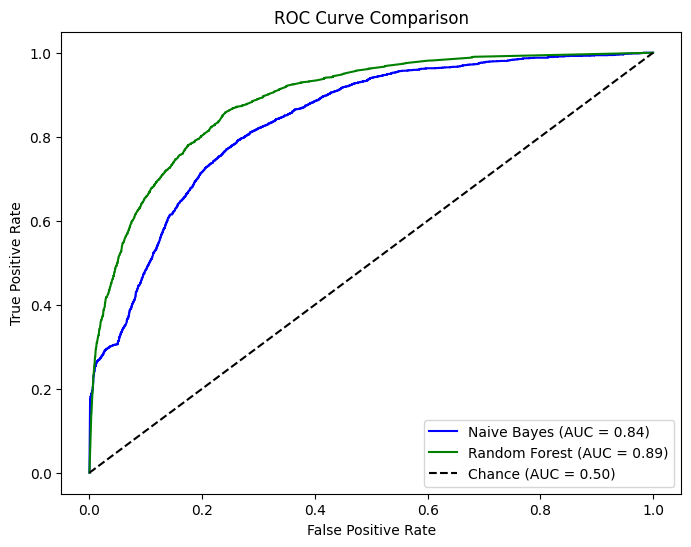

In [35]:
# Predicting probabilities for Naive Bayes and random forest
nb_probs = nb_model.predict_proba(X_test)[:, 1]
rf_probs = rf_model.predict_proba(X_test)[:, 1]

# Calculate ROC curves
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_probs, pos_label=nb_model.classes_[1])
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs, pos_label=rf_model.classes_[1])

# Calculating AUCs
nb_auc = auc(nb_fpr, nb_tpr)
rf_auc = auc(rf_fpr, rf_tpr)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(nb_fpr, nb_tpr, label=f'Naive Bayes (AUC = {nb_auc:.2f})', color='blue')
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_auc:.2f})', color='green')
plt.plot([0, 1], [0, 1], 'k--', label='Chance (AUC = 0.50)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.show()

